In [93]:
import numpy as np
import pandas as pd

In [94]:
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')

In [95]:
train.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [96]:
test.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6,B
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6,A
2,458996,Female,Yes,69,No,NaN,0.0,Low,1.0,Cat_6,A
3,459000,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6,B
4,459001,Female,No,19,No,Marketing,NaN,Low,4.0,Cat_6,A


In [97]:
ID_train = train['ID']
ID_test = test['ID']

In [98]:
train['Train_Test'] = 0
test['Train_Test'] = 1

In [99]:
df = pd.concat([train, test], ignore_index=True)

In [100]:
df

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation,Train_Test
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D,0
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A,0
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B,0
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B,0
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A,0
...,...,...,...,...,...,...,...,...,...,...,...,...
10690,467954,Male,No,29,No,Healthcare,9.0,Low,4.0,Cat_6,B,1
10691,467958,Female,No,35,Yes,Doctor,1.0,Low,1.0,Cat_6,A,1
10692,467960,Female,No,53,Yes,Entertainment,NaN,Low,2.0,Cat_6,C,1
10693,467961,Male,Yes,47,Yes,Executive,1.0,High,5.0,Cat_4,C,1


In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10695 entries, 0 to 10694
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               10695 non-null  int64  
 1   Gender           10695 non-null  object 
 2   Ever_Married     10505 non-null  object 
 3   Age              10695 non-null  int64  
 4   Graduated        10593 non-null  object 
 5   Profession       10533 non-null  object 
 6   Work_Experience  9597 non-null   float64
 7   Spending_Score   10695 non-null  object 
 8   Family_Size      10247 non-null  float64
 9   Var_1            10587 non-null  object 
 10  Segmentation     10695 non-null  object 
 11  Train_Test       10695 non-null  int64  
dtypes: float64(2), int64(3), object(7)
memory usage: 1002.8+ KB


# Plan
- Get used to the data
- Data clearning
- Exploratory data analysis
- Check whether the target is skewed.
- Handle missing values
- Handle outliers
- Check correlation between numerical variables
- Add features if needed
- Skewed data
- Scale data
- Get dummies and label encoding
- Train-Test-Val split
- Train model

# Get used to the data

In [102]:
for col in df.columns:
    print('###', col, ':\n')
    if len(df[col].unique()) >= 10:
        print(df[col].unique()[:10], ' (len = {})\n'.format(len(df[col].unique())))
    else:
        print(df[col].unique(), ' (len = {})\n'.format(len(df[col].unique())), '\n')
    print('Dtype: {}'.format(df[col].dtype))
    print('Number of null values: {}'.format(df[col].isnull().sum()), '\n')
    print('---------------------\n')

### ID :

[462809 462643 466315 461735 462669 461319 460156 464347 465015 465176]  (len = 8363)

Dtype: int64
Number of null values: 0 

---------------------

### Gender :

['Male' 'Female']  (len = 2)
 

Dtype: object
Number of null values: 0 

---------------------

### Ever_Married :

['No' 'Yes' nan]  (len = 3)
 

Dtype: object
Number of null values: 190 

---------------------

### Age :

[22 38 67 40 56 32 33 61 55 26]  (len = 67)

Dtype: int64
Number of null values: 0 

---------------------

### Graduated :

['No' 'Yes' nan]  (len = 3)
 

Dtype: object
Number of null values: 102 

---------------------

### Profession :

['Healthcare' 'Engineer' 'Lawyer' 'Entertainment' 'Artist' 'Executive'
 'Doctor' 'Homemaker' 'Marketing' nan]  (len = 10)

Dtype: object
Number of null values: 162 

---------------------

### Work_Experience :

[ 1. nan  0.  4.  9. 12.  3. 13.  5.  8.]  (len = 16)

Dtype: float64
Number of null values: 1098 

---------------------

### Spending_Score :

['Low

In [103]:
# Comments

'''
- Drop ID
- Age => AgeGroup
- Check the relation between nans of Profession and Work_Experience 
''';

# Cleaning data

In [104]:
# Drop ID column
df.drop(['ID'], axis=1, inplace=True)

# Exploratory Data Analysis (EDA) on raw data

In [105]:
import matplotlib.pyplot as plt
import seaborn as sns

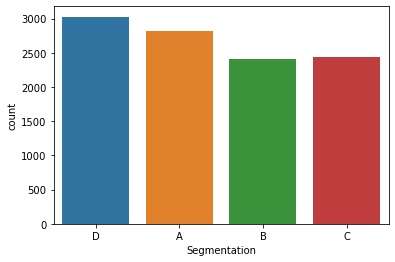

In [106]:
# Target Variable

sns.countplot(data=df, x='Segmentation')
plt.show()

All 4 classes distribute quite evenly. It is good to use accuracy as a metric

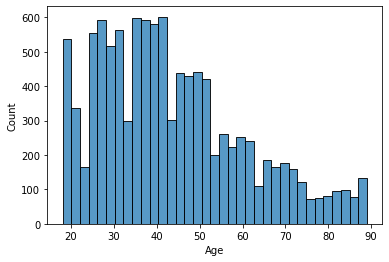

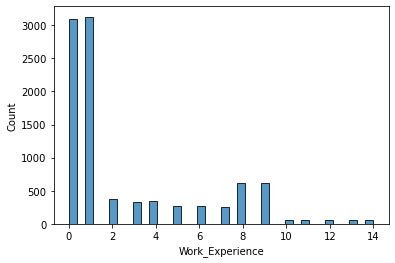

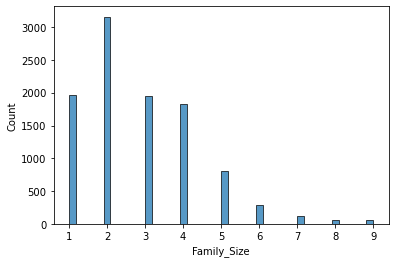

In [107]:
#####################################
# Numerical Variables (Univariable) #
#####################################

num_cols = ['Age', 'Work_Experience', 'Family_Size']

for col in num_cols:
    sns.histplot(data=df, x=col)
    plt.show()

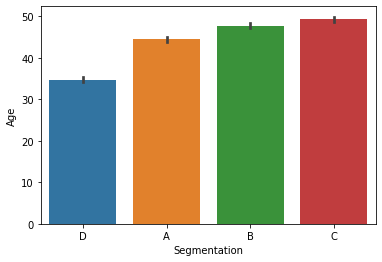

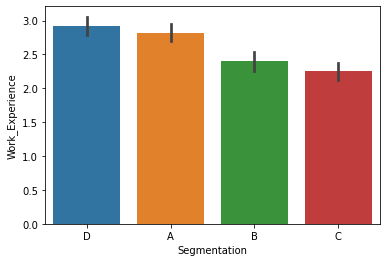

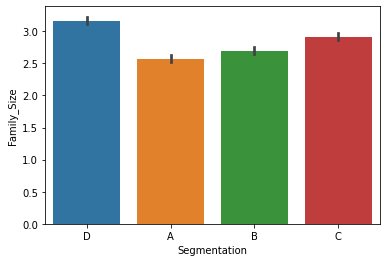

In [108]:
#######################################
# Numerical Variables (Multivariable) #
#######################################

num_cols = ['Age', 'Work_Experience', 'Family_Size']

for col in num_cols:
    sns.barplot(data=df, x='Segmentation', y=col)
    plt.show()

<AxesSubplot:>

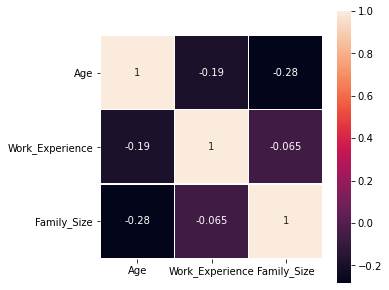

In [109]:
###########################################
# Correlation between numerical variables #
###########################################

fig = plt.figure(figsize=(5,5))
sns.heatmap(data=df[num_cols].corr(), annot=True, linewidths=0.5, square=True)

There is no strong correlation between numerical variables.

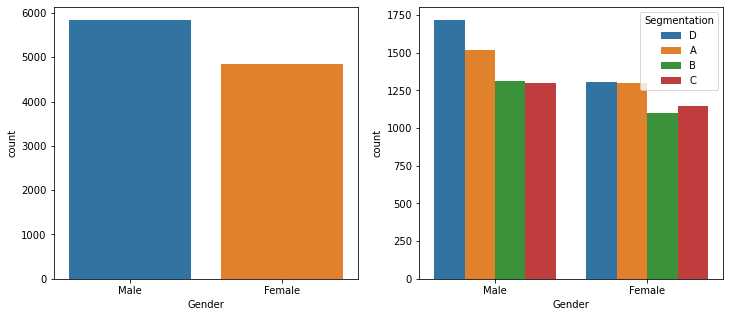

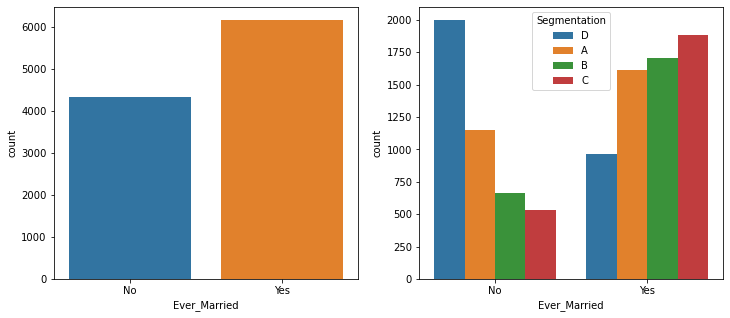

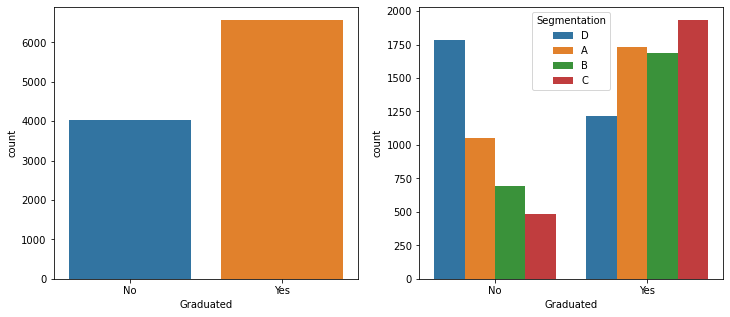

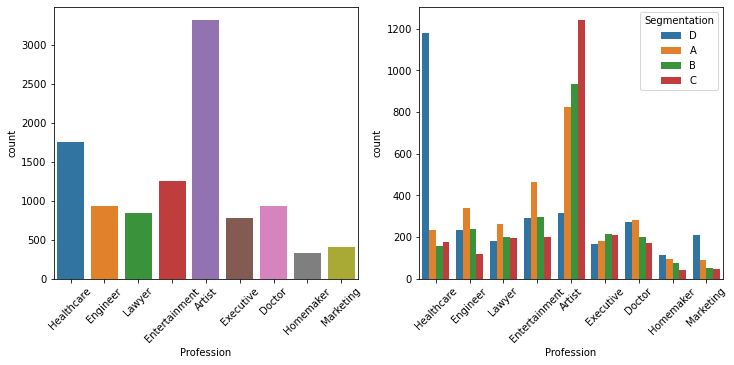

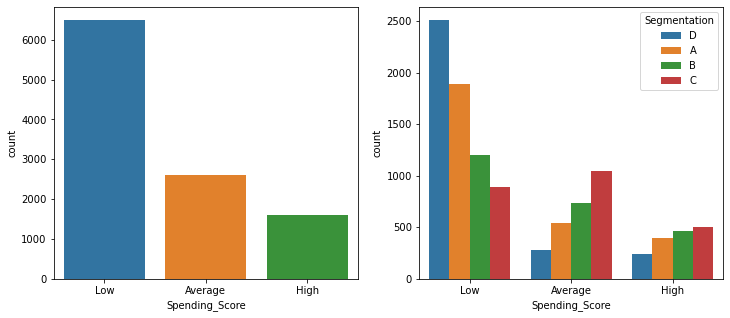

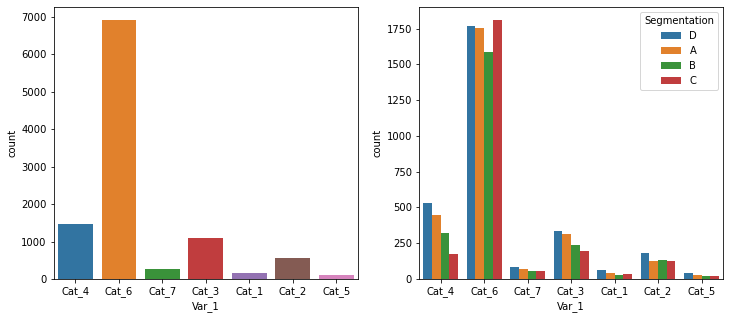

In [110]:
#########################
# Categorical variables #
#########################

cat_cols = ['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Spending_Score', 'Var_1']

for col in cat_cols:
    fig, ax = plt.subplots(1,2, figsize=(12,5))
    sns.countplot(data=df, x=col, ax=ax[0])
    if col == 'Profession':
        ax[0].tick_params(axis='x', rotation=45)
    
    sns.countplot(data=df, x=col, hue='Segmentation', ax=ax[1])
    if col == 'Profession':
        ax[1].tick_params(axis='x', rotation=45)
        
    plt.show()

# Handle missing values

In [111]:
df.isnull().sum().sort_values(ascending=False)

Work_Experience    1098
Family_Size         448
Ever_Married        190
Profession          162
Var_1               108
Graduated           102
Gender                0
Age                   0
Spending_Score        0
Segmentation          0
Train_Test            0
dtype: int64

In [112]:
# Both Profession and Work_Experience is null

index = df[(df['Profession'].isnull()) & (df['Work_Experience'].isnull())].index

df.drop(index=index, inplace=True)

In [113]:
# Profession

df['Profession'] = df['Profession'].fillna('Other')

In [114]:
# Work_Experience

df['Work_Experience'] = df.groupby(by='Profession')['Work_Experience'].apply(lambda x: x.fillna(x.mode()[0]))

In [116]:
# Both Family_Size and Ever_Married is null

index = df[(df['Family_Size'].isnull()) & (df['Ever_Married'].isnull())].index

df.drop(index=index, inplace=True)

In [118]:
# Family_Size

df['Family_Size'] = df['Family_Size'].fillna(df['Family_Size'].mode()[0])

In [119]:
# Ever_Married

df['Ever_Married'] = df['Ever_Married'].fillna(df['Ever_Married'].mode()[0])

In [121]:
# Graduated

df['Graduated'] = df['Graduated'].fillna(df['Graduated'].mode()[0])

In [124]:
# Var_1

df.dropna(subset=['Var_1'], inplace=True)

In [125]:
df.isnull().sum().sort_values(ascending=False)

Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
Segmentation       0
Train_Test         0
dtype: int64